In [140]:
import pandas
titanic = pandas.read_csv("data/train.csv")
print (titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [141]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
print (titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [142]:
print (titanic["Sex"].unique())

# Replace all the orrurences of male with the number 0
titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
titanic.loc[titanic["Sex"] == "female", "Sex"] = 1


['male' 'female']


In [143]:
print (titanic["Embarked"].unique())
titanic["Embarked"] = titanic["Embarked"].fillna('S')
titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 0
titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 1
titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 2
print(titanic.head())

['S' 'C' 'Q' nan]
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris   0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   1  38.0      1      0   
2                             Heikkinen, Miss. Laina   1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   1  35.0      1      0   
4                           Allen, Mr. William Henry   0  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        0  
1          PC 17599  71.2833   C85        1  
2  STON/O2. 3101282   7.9250   NaN        0  
3            113803  53.1000  C123        0  
4            373450   8.0500   NaN        0  


In [144]:
# import the linear regression class
from sklearn.linear_model import LinearRegression
# Sklearn also has a helper that makes it easy to do cross validation
from sklearn.cross_validation import KFold

# The columns use to predict the target
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Initialize our algorithm class
alg = LinearRegression()
# Generate cross validation folds for the titanic dataset
# set_random_state to ensure we get the same splits every time we run it
kf = KFold(titanic.shape[0], n_folds=3, random_state = 1)
# kf = KFold(n_splits=2)
# help(KFold)

predictions= []

for train, test in kf:
        # The predictors we are using the train the algorithm
        train_predictors = (titanic[predictors].iloc[train, :])
        # The target we are using to train the algorithm
        train_target = titanic["Survived"].iloc[train]
        # Training the algorithm using the predictors and target
        alg.fit(train_predictors, train_target)
        # We can now make predictions on the test fold
        test_predictions = alg.predict(titanic[predictors].iloc[test, :])
        predictions.append(test_predictions)


In [121]:
import numpy as np

# The predictions are in three separate numpy arrays. Concatenate them into one
predictions = np.concatenate(predictions, axis = 0)

# Map predictions to outcomes (only possible outcomes are 1 and 0)
predictions[predictions > .5] = 1
predictions[predictions <= .5] = 0
accuracy = sum(predictions[predictions == titanic["Survived"]]) / len(predictions)
print (accuracy)

0.383838383838


In [122]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
# Initialize our algorithm
alg = LogisticRegression(random_state = 1)
# Compute the accuracy score for all the cross validation folds
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv = 3)
print(scores.mean())

0.787878787879


In [123]:
# test data clean up
titanic_test = pandas.read_csv("data/test.csv")
titanic_test["Age"] = titanic["Age"].fillna(titanic["Age"].median())
titanic_test["Fare"] = titanic["Fare"].fillna(titanic["Fare"].median())
titanic_test.loc[titanic["Sex"] == "male", "Sex"] = 0
titanic_test.loc[titanic["Sex"] == "female", "Sex"] = 1

titanic_test["Embarked"] = titanic_test["Embarked"].fillna("S")
titanic_test.loc[titanic["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic["Embarked"] == "C", "Embarked"] = 1
titanic_test.loc[titanic["Embarked"] == "Q", "Embarked"] = 2




In [124]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Initialize our algorithm with the default parameters
# the number of trees we want to make                     --      n_estimators
# the minimum number of rows to split                     --      min_samples_split
# the minimum number of samples when a tree branch ends   --      min_samples_leaf
alg = RandomForestClassifier(random_state = 1, n_estimators = 10, min_samples_split = 2, min_samples_leaf = 1)
# Compute the accuracy score for all the cross validation folds
kf = cross_validation.KFold(titanic.shape[0], n_folds = 3, random_state = 1)
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv = kf)

print(scores.mean())

0.785634118967


In [125]:
# After adjusting random forest parameters
# Several scnerios to prevent like - set the tree too high to overfit
alg = RandomForestClassifier(random_state = 1, n_estimators = 50, min_samples_split = 4, min_samples_leaf = 2)
# Compute the accuracy score for all the cross validation folds
kf = cross_validation.KFold(titanic.shape[0], n_folds = 3, random_state = 1)
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv = kf)

print(scores.mean())

0.81593714927


In [126]:
# More improvements on adding more features
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]

# The apply method generates a new series
titanic["NameLength"] = titanic["Name"].apply(lambda x: len(x))

In [127]:
import re

# A function to get the title from a name
def get_title(name):
    # Use a regular expression to search for a title.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it
    if title_search:
        return title_search.group()
    return ""

# Extract all the titles and print how often each one occurs
titles = titanic["Name"].apply(get_title)

print(pandas.value_counts(titles))

# Map title with maps
title_mapping = {" Mr.": 1, " Miss.": 2, " Mrs.": 3, " Master.": 4, " Dr.": 5, " Rev.": 6, " Major.": 7, " Col.": 8, " Mlle.": 9, " Jonkheer.": 10, " Lady.": 11, " Mme.": 12, " Countess.": 13, " Capt.": 14, " Ms.": 15, " Don.": 16, " Sir.": 17}
for k, v in title_mapping.items():
    titles[titles.replace(" ", "") == k] = v

print(pandas.value_counts(titles))

# Add titles to titanic column
titanic["Title"] = titles


 Mr.          517
 Miss.        182
 Mrs.         125
 Master.       40
 Dr.            7
 Rev.           6
 Mlle.          2
 Col.           2
 Major.         2
 Ms.            1
 Capt.          1
 Sir.           1
 Mme.           1
 Jonkheer.      1
 Lady.          1
 Countess.      1
 Don.           1
Name: Name, dtype: int64
1     517
2     182
3     125
4      40
5       7
6       6
8       2
7       2
9       2
16      1
10      1
11      1
12      1
13      1
14      1
15      1
17      1
Name: Name, dtype: int64


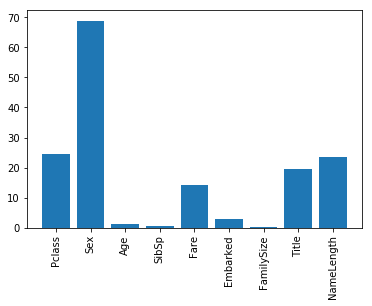

In [128]:
# Feature importance analysis

import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

predictors = ["Pclass", "Sex", "Age", "SibSp", "Fare", "Embarked", "FamilySize", "Title", "NameLength"]

# Perform feature selection
selector = SelectKBest(f_classif, k ='all')
selector.fit(titanic[predictors], titanic["Survived"])

# GEt the raw p-value for each feature, and transform from p-value into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores and exam the importance of "Pclass", "Sex", "Fare"
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

# Pick only the four best features
predictors = ["Pclass", "Sex", "Fare", "Title"]

In [134]:
# Ensemble multiple classifier to evaluate performamce 
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# The algorithm we want to ensemble
# We're using the more linear predictors for the logistic regression
#                 random predictors for the gradient boosting classifier
algorithms = [
    [GradientBoostingClassifier(random_state = 1, n_estimators = 25, max_depth=3), ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]],
    [LogisticRegression(random_state = 1), ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]]
]

# Initialize the cross validation folds
kf = KFold(titanic.shape[0], n_folds=3, random_state = 1)

predictions = []
for train, test in kf:
    train_target = titanic["Survived"].iloc[train]
    full_test_predictions = []
    # Make predictions for each algorithm on each fold
    for alg, predictors in algorithms:
        # Fit the algorithm on the training data
        alg.fit(titanic[predictors].iloc[train, :], train_target)
        # Select and predict on the test fold
        # the .astype(float) is necessary to convert the dataframe to all floats and avoid an sklearn error
        test_predictions = alg.predict_proba(titanic[predictors].iloc[test, :].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    # Use a simple ensembling scheme -- just average the predictions to get the final classification
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    # Any value over .5 is assumed to be a 1 prediction, and below .5 is a 0 prediction
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)
    
# Summize all predictions results
predictions = np.concatenate(predictions, axis = 0)

# Compute accuracy by comparing to the training data
accuracy = sum(predictions[predictions == titanic["Survived"]]) / len(predictions)
print(accuracy)

0.27721661055
